### Desafío Integrador
#### Análisis de las producciones del personal de Ciencia y Tecnología

### Etapa 2: Desarrollo de un modelo para determinar si las personas publicarán en revistas de prestigio

#### 1. Lectura e interpretación de la tabla

In [136]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
#Lectura del archivo
df=pd.read_csv('personas_publico_prestigio_2012.csv')
df_original=df
df.head()

,Unnamed: 0,persona_id,publico_articulos,cant_articulos_prestigio,publico_prestigio,produccion_cantidad_articulos_total,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,...,prod_2_años_ant,prod_3_años_ant,max_grado_academico,gran_area_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,rango_edad
0,46638,63011,0,0,0,0,0.0,0.0,1.0,0.0,...,2.0,2.0,Universitario de posgrado/especialización,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,Regular o por concurso,De 20 hasta 39 horas,Jefe de trabajos prácticos,No pertenece a Conicet,"(50, 60]"
1,21207,28444,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Universitario de grado,INGENIERÍAS Y TECNOLOGÍAS,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Jefe de trabajos prácticos,No pertenece a Conicet,"(30, 40]"
2,35869,46728,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,Universitario de grado,HUMANIDADES,INVESTIGADOR,Regular o por concurso,40 horas o más,Profesor asociado,No pertenece a Conicet,"(50, 60]"
3,56101,86108,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Universitario de posgrado/especialización,CIENCIAS MÉDICAS Y DE LA SALUD,DOCENTE,Interino,De 20 hasta 39 horas,Profesor titular,No pertenece a Conicet,"(50, 60]"
4,24678,33172,1,0,0,7,0.0,0.0,2.0,0.0,...,3.0,8.0,Universitario de posgrado/maestría,HUMANIDADES,INVESTIGADOR,Interino,De 0 hasta 19 horas,Jefe de trabajos prácticos,No pertenece a Conicet,"(40, 50]"


In [138]:
df.drop(columns='Unnamed: 0',inplace=True)

#### 2. Generación de dummies

In [139]:
#Se generan dummies para sexo 
df_dummies = pd.get_dummies(df['sexo'], prefix='sexo',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='sexo',inplace=True)

In [140]:
#Se generan dummies para rango_edad 
df_dummies = pd.get_dummies(df['rango_edad'], prefix='edad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='rango_edad',inplace=True)

In [141]:
#Se generan dummies para tipo_personal
df_dummies = pd.get_dummies(df['tipo_personal'], prefix='t_personal',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='tipo_personal',inplace=True)

In [142]:
#Se generan dummies para condicion_docente
df_dummies = pd.get_dummies(df['condicion_docente'], prefix='cond_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='condicion_docente',inplace=True)

In [143]:
#Se generan dummies para ded_horaria_docente
df_dummies = pd.get_dummies(df['ded_horaria_docente'], prefix='ded_horaria',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='ded_horaria_docente',inplace=True)

In [144]:
#Se generan dummies para max_grado_academico
df_dummies = pd.get_dummies(df['max_grado_academico'], prefix='grado_acad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='max_grado_academico',inplace=True)

In [145]:
#Se generan dummies para categoria_conicet
df_dummies = pd.get_dummies(df['categoria_conicet'], prefix='cat_conicet',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='categoria_conicet',inplace=True)

In [146]:
#Se generan dummies para clase_cargo_docente
df_dummies = pd.get_dummies(df['clase_cargo_docente'], prefix='clase_cargo_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='clase_cargo_docente',inplace=True)

In [147]:
#Se prueba un primer modelo tomando de las opciones de área la más abarcativa (gran area experticia)
#Se generan dummies para 'gran_area_experticia'
df_dummies = pd.get_dummies(df['gran_area_experticia'], prefix='area_exp',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='gran_area_experticia',inplace=True)

In [148]:
for i in df.columns:
    print(i)

persona_id
publico_articulos
cant_articulos_prestigio
publico_prestigio
produccion_cantidad_articulos_total
movilidad_posgrado_exterior
movilidad_estancias_exterior
produccion_cantidad_libros
produccion_patentes_solicitadas
produccion_patentes_otorgadas
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_referato_internacional
actividad_evaluacion_proyectos
proyectos_direccion
formacion_participacion_taller
formacion_participacion_conferencia
produccion_publicacion_congreso
membresia_asociaciones_cyt
movilidad_posdoctorado_exterior
proyectos_financiamiento_externo
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_p

In [149]:
#Se define la matriz target y la matriz de features
X=df.drop(columns=[ 'publico_articulos','cant_articulos_prestigio',
       'publico_prestigio','produccion_cantidad_articulos_total','persona_id'])

y =df['publico_prestigio']


In [150]:
for i in X.columns:
    print(i)

movilidad_posgrado_exterior
movilidad_estancias_exterior
produccion_cantidad_libros
produccion_patentes_solicitadas
produccion_patentes_otorgadas
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_referato_internacional
actividad_evaluacion_proyectos
proyectos_direccion
formacion_participacion_taller
formacion_participacion_conferencia
produccion_publicacion_congreso
membresia_asociaciones_cyt
movilidad_posdoctorado_exterior
proyectos_financiamiento_externo
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_personal_OTRO PERSONAL DE LA INSTITUCION
cond_docente_Por contrato
cond_docente_Regular o por concurso
cond_d

In [151]:
# Hacemos el split entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### 3. Regresión logística

In [152]:
#Se hace GridSearch para Logistic Regression
#Se estandarizan las variables

X_train['prod_ultimo_año']=scaler.fit_transform(X_train[['prod_ultimo_año']])
X_train['prod_año_ant']=scaler.fit_transform(X_train[['prod_año_ant']])
X_train['prod_2_años_ant']=scaler.fit_transform(X_train[['prod_2_años_ant']])
X_train['prod_3_años_ant']=scaler.fit_transform(X_train[['prod_3_años_ant']])
X_train['produccion_cantidad_libros']=scaler.fit_transform(X_train[['produccion_cantidad_libros']])
X_train['produccion_patentes_otorgadas']=scaler.fit_transform(X_train[['produccion_patentes_otorgadas']])
X_train['produccion_patentes_solicitadas']=scaler.fit_transform(X_train[['produccion_patentes_solicitadas']])

X_test['prod_ultimo_año']=scaler.transform(X_test[['prod_ultimo_año']])
X_test['prod_año_ant']=scaler.transform(X_test[['prod_año_ant']])
X_test['prod_2_años_ant']=scaler.transform(X_test[['prod_2_años_ant']])
X_test['prod_3_años_ant']=scaler.transform(X_test[['prod_3_años_ant']])
X_test['produccion_cantidad_libros']=scaler.transform(X_test[['produccion_cantidad_libros']])
X_test['produccion_patentes_otorgadas']=scaler.transform(X_test[['produccion_patentes_otorgadas']])
X_test['produccion_patentes_solicitadas']=scaler.transform(X_test[['produccion_patentes_solicitadas']])



In [153]:
modelo_LR_prestigio =  LogisticRegression()

hyperparameters = {'C': np.logspace(0, 4, 8), 
                   'penalty': ['l1', 'l2']}

clasificador = GridSearchCV(modelo_LR_prestigio, hyperparameters, cv=5, verbose=0)

mejor_modelo_LR_prestigio = clasificador.fit(X_train, y_train)

print('Mejor Penalización:', mejor_modelo_LR_prestigio.best_estimator_.get_params()['penalty'])
print('Mejor C:', mejor_modelo_LR_prestigio.best_estimator_.get_params()['C'])

mejor_modelo_LR_prestigio.best_score_



Mejor Penalización: l1
Mejor C: 1.0


0.8297743826612187

In [154]:
#Se genera el modelo
modelo_LR_prestigio =  LogisticRegression(penalty='l1',C=1)
modelo_LR_prestigio.fit(X_train,y_train)
y_pred_LR_prestigio=modelo_LR_prestigio.predict(X_test)

print(accuracy_score(y_test, y_pred_LR_prestigio))
print(recall_score(y_test, y_pred_LR_prestigio))
print(precision_score(y_test, y_pred_LR_prestigio))


0.7038880473202048
0.9619157530294288
0.6345037586830335


In [155]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_LR_prestigio))

             precision    recall  f1-score   support

          0       0.92      0.45      0.60      6931
          1       0.63      0.96      0.76      6932

avg / total       0.78      0.70      0.68     13863



0.7038880473202048


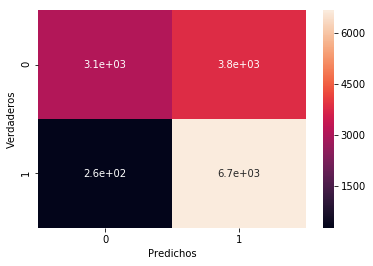

In [156]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred_LR_prestigio)

sns.heatmap(confusion_matrix(y_test, y_pred_LR_prestigio), annot=True)

print(accuracy_score(y_test, y_pred_LR_prestigio))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [157]:
#Curva ROC
y_probs_logit = modelo_LR_prestigio.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000000,2.0
1,0.074737,0.421668,1.0
2,0.078777,0.436093,1.0
3,0.080508,0.442152,1.0
4,0.081374,0.445615,1.0


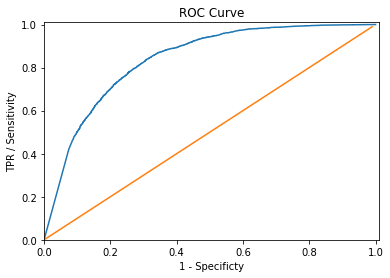

In [158]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [159]:
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.8369485343243677


In [160]:
X_test.shape,X_test.shape

((13863, 125), (13863, 125))

In [161]:
coef=pd.DataFrame(X_test.columns,columns=['Feature'])
coef['ponderador']=modelo_LR_prestigio.coef_.reshape(125,1)

In [162]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
44,grado_acad_Universitario de posgrado/doctorado,1.484346
25,"edad_(20, 30]",1.207383
88,clase_cargo_docente_Docente Adscripto,1.103241
52,cat_conicet_Investigador principal,0.967613
65,clase_cargo_docente_Auxiliar académico,0.815871
11,actividad_evaluacion_referato_internacional,0.772248
26,"edad_(30, 40]",0.743141
20,prod_ultimo_año,0.726551
58,clase_cargo_docente_Asistente de primera,0.710684
37,cond_docente_no docente,0.702866


#### 4. Árboles de decisión

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [164]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=5, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))


In [165]:
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')

evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.764 ± 0.004
Rendimiento de Bagging AD:	0.804 ± 0.006
Rendimiento de Random Forest:	0.81 ± 0.005
Rendimiento de Extra Trees:	0.802 ± 0.007


In [166]:
dt.fit(X_train,y_train)
bdt.fit(X_train,y_train)
rf.fit(X_train,y_train)
et.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [167]:
dt_pred=dt.predict(X_test)
bdt_pred=bdt.predict(X_test)
rf_pred=rf.predict(X_test)
et_pred=et.predict(X_test)

In [168]:
print(precision_score(y_test, dt_pred))
print(precision_score(y_test, bdt_pred))
print(precision_score(y_test, rf_pred))
print(precision_score(y_test, et_pred))

0.5745147494242789
0.624927870744374
0.6397608370702541
0.6913861950941244


In [169]:
#Aplicamos GridSearch para el modelo de árboles que mejor nos dio
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [170]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
et = ExtraTreesClassifier(class_weight='balanced')
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [171]:
grid_search_et = GridSearchCV(et, param_grid=param_trees, cv=kf, verbose=1, n_jobs=3)

In [172]:
grid_search_et.fit(X_train, y_train)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   21.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 16.4min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 36.3min
[Parallel(n_jobs=3)]: Done 1125 out of 1125 | elapsed: 58.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [173]:
grid_search_et.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=50, max_features=21,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [174]:
modelo_et=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=100, max_features=21,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [175]:
modelo_et.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=100, max_features=21,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [176]:
y_pred_et_prestigio=modelo_et.predict(X_test)

In [177]:
print(accuracy_score(y_test, y_pred_et_prestigio))
print(recall_score(y_test, y_pred_et_prestigio))
print(precision_score(y_test, y_pred_et_prestigio))

0.7864098679939407
0.8994518176572418
0.7336157194964114


0.7864098679939407


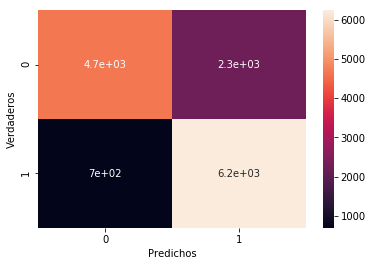

In [178]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred_et_prestigio)

sns.heatmap(confusion_matrix(y_test, y_pred_et_prestigio), annot=True)

print(accuracy_score(y_test, y_pred_et_prestigio))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [179]:
#Curva ROC
y_probs_logit = modelo_et.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000000,2.000000
1,0.000144,0.012983,1.000000
2,0.000144,0.013128,0.999844
3,0.000144,0.015003,0.999835
4,0.000144,0.015436,0.999565


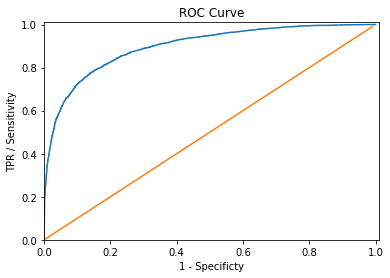

In [180]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [181]:
coef=pd.DataFrame(X_test.columns,columns=['Feature'])
coef.shape

(125, 1)

In [182]:
coef['ponderador']=modelo_et.feature_importances_.reshape(125,1)

In [183]:
coef.head()

,Feature,ponderador
0,movilidad_posgrado_exterior,2.394616e-03
1,movilidad_estancias_exterior,1.517717e-02
2,produccion_cantidad_libros,1.512520e-03
3,produccion_patentes_solicitadas,4.310660e-05
4,produccion_patentes_otorgadas,5.960300e-07


In [184]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
54,cat_conicet_No pertenece a Conicet,0.135583
44,grado_acad_Universitario de posgrado/doctorado,0.130327
32,t_personal_DOCENTE,0.121077
122,area_exp_CIENCIAS SOCIALES,0.066602
121,area_exp_CIENCIAS NATURALES Y EXACTAS,0.060401
11,actividad_evaluacion_referato_internacional,0.056582
34,t_personal_OTRO PERSONAL DE LA INSTITUCION,0.041351
20,prod_ultimo_año,0.040775
21,prod_año_ant,0.030601
123,area_exp_HUMANIDADES,0.028968


#### 5. XGBoost

In [185]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st

In [186]:
modelo_xgb_prestigio= XGBClassifier(nthreads=-1)

In [187]:
one_to_left = st.beta(10, 1)

In [188]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [189]:
xgb = RandomizedSearchCV(modelo_xgb_prestigio,params, n_iter=25, verbose= True)

In [190]:
for i in X_train.columns:
    print(i)

movilidad_posgrado_exterior
movilidad_estancias_exterior
produccion_cantidad_libros
produccion_patentes_solicitadas
produccion_patentes_otorgadas
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_referato_internacional
actividad_evaluacion_proyectos
proyectos_direccion
formacion_participacion_taller
formacion_participacion_conferencia
produccion_publicacion_congreso
membresia_asociaciones_cyt
movilidad_posdoctorado_exterior
proyectos_financiamiento_externo
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_personal_OTRO PERSONAL DE LA INSTITUCION
cond_docente_Por contrato
cond_docente_Regular o por concurso
cond_d

In [191]:
X_test_xgb=X_test.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})
                       

In [192]:
X_train_xgb=X_train.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})                     

In [193]:
import time
start = time.time()
xgb.fit(X_train_xgb,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  7.4min finished


La búsqueda con XGBoost llevó:  452.34725284576416  segundos


In [194]:
opt_xgb = xgb.best_estimator_

In [195]:
y_pred_xgb_prestigio_predictproba = opt_xgb.predict_proba(X_test_xgb)

In [196]:
y_pred_xgb_prestigio = opt_xgb.predict(X_test_xgb)

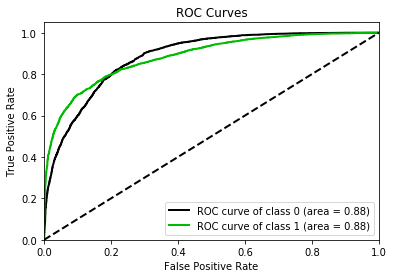

In [197]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,y_pred_xgb_prestigio_predictproba, plot_micro = False, plot_macro= False)

In [198]:
xgb_auc = roc_auc_score(y_test,y_pred_xgb_prestigio_predictproba[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.8842038116549555


In [199]:
print(accuracy_score(y_test, y_pred_xgb_prestigio))
print(recall_score(y_test, y_pred_xgb_prestigio))
print(precision_score(y_test, y_pred_xgb_prestigio))

0.6988386352160427
0.9555683785343335
0.6313983414355162


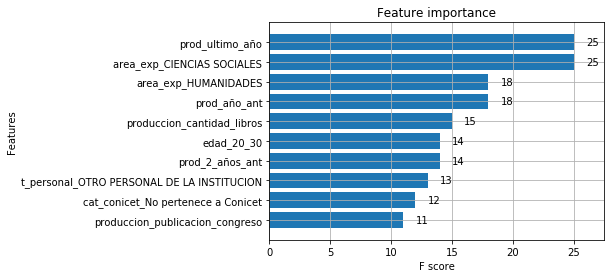

In [200]:
from xgboost import plot_importance
plot_importance(opt_xgb, height = 0.8,max_num_features=10)

In [201]:
print(opt_xgb.feature_importances_)

[0.00321982 0.01016187 0.00491424 0.         0.         0.
 0.00333565 0.00230127 0.         0.00300469 0.         0.02956377
 0.00462379 0.00179037 0.         0.         0.01447542 0.00471931
 0.01865424 0.0137315  0.06627986 0.14546455 0.01156879 0.00534348
 0.00172873 0.01354355 0.00845024 0.00957974 0.00331334 0.00205582
 0.         0.         0.05059758 0.0577057  0.02605398 0.00252759
 0.001703   0.01922249 0.00223106 0.00307829 0.0045385  0.00763834
 0.00346466 0.00249144 0.14369765 0.02151226 0.00242681 0.
 0.         0.         0.         0.         0.         0.
 0.10139042 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00415908 0.         0.         0.00298965 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

#### 6. Light GBM

In [202]:
import lightgbm as lgb

In [203]:
modelo_LGBM_prestigio = lgb.LGBMClassifier()

In [204]:
lgbm_prestigio = RandomizedSearchCV(modelo_LGBM_prestigio, params, n_iter = 25, verbose= True)

In [205]:
start = time.time()
lgbm_prestigio.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   31.2s finished


La búsqueda con LightGBM llevó:  31.637272119522095  segundos


In [206]:
print('Best parameters found by grid search are:', lgbm_prestigio.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.990938659485245, 'gamma': 2.9668861521252996, 'learning_rate': 0.35878145729331634, 'max_depth': 7, 'min_child_weight': 17.204512686537704, 'n_estimators': 37, 'reg_alpha': 9.0183597960577, 'subsample': 0.9851707800781762}


In [207]:
opt_lgbm_prestigio = lgbm_prestigio.best_estimator_

In [208]:
y_pred_lgbm_predictproba = opt_lgbm_prestigio.predict_proba(X_test)

In [209]:
y_pred_lgbm_prestigio = opt_lgbm_prestigio.predict(X_test)

In [210]:
lgbm_auc_prestigio = roc_auc_score(y_test,y_pred_lgbm_predictproba[:,1])
print("El valor del AUC es: ", lgbm_auc_prestigio)

El valor del AUC es:  0.8782950716996645


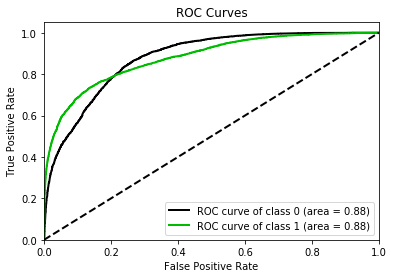

In [211]:
plot_roc(y_test,y_pred_lgbm_predictproba, plot_micro = False, plot_macro= False)

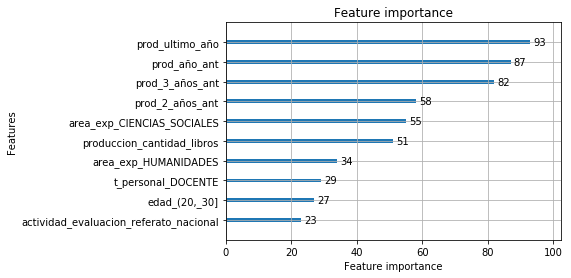

In [212]:
lgb.plot_importance(opt_lgbm_prestigio, max_num_features=10)

In [213]:
print(accuracy_score(y_test, y_pred_lgbm_prestigio))
print(recall_score(y_test, y_pred_lgbm_prestigio))
print(precision_score(y_test, y_pred_lgbm_prestigio))

0.6872249873764698
0.960328909405655
0.6211046837096473


In [214]:
df_original.columns

Index(['persona_id', 'publico_articulos', 'cant_articulos_prestigio',
       'publico_prestigio', 'produccion_cantidad_articulos_total',
       'movilidad_posgrado_exterior', 'movilidad_estancias_exterior',
       'produccion_cantidad_libros', 'produccion_patentes_solicitadas',
       'produccion_patentes_otorgadas', 'actividad_evaluacion_rrhh_becarios',
       'actividad_evaluacion_rrhh_investigadores',
       'actividad_evaluacion_rrhh_premios',
       'actividad_evaluacion_comite_editorial_nacional',
       'actividad_evaluacion_referato_nacional',
       'actividad_evaluacion_comite_editorial_internacional',
       'actividad_evaluacion_referato_internacional',
       'actividad_evaluacion_proyectos', 'proyectos_direccion',
       'formacion_participacion_taller', 'formacion_participacion_conferencia',
       'produccion_publicacion_congreso', 'membresia_asociaciones_cyt',
       'movilidad_posdoctorado_exterior', 'proyectos_financiamiento_externo',
       'sexo', 'prod_ultimo_año'

In [215]:
df_original['publico_prestigio'].value_counts()

1    21004
0    21004
Name: publico_prestigio, dtype: int64

#### 7. Estimación de las publicaciones en revistas de prestigio para 2021

In [216]:
#Se trabaja con el modelo que mejor dio: Extra trees

In [217]:
df_2017_original=pd.read_csv('personas_2017_para_estimar.csv')
df_2017_original.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [218]:
#Lectura de la base 2017
df_2017=pd.read_csv('personas_2017_para_estimar.csv')
df_2017.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [219]:
df_2017_original.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [220]:
#Se eliminan columnas que no se usarán
df_2017.drop(columns=['Unnamed: 0','persona_id'],inplace=True)

In [221]:
df_2017.shape

(62553, 122)

In [222]:
X_train.shape

(28145, 125)

In [223]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['cat_conicet_Gestión CyT', 'cat_conicet_Investigador correspondiente',
       'cat_conicet_Pasante', 'clase_cargo_docente_Docente auxiliar alumno',
       'clase_cargo_docente_Docente técnico profesional',
       'clase_cargo_docente_Profesor asistente',
       'clase_cargo_docente_Profesor ayudante A',
       'clase_cargo_docente_Profesor de extensión',
       'clase_cargo_docente_Profesor nivel B', 'edad_(10, 20]',
       'edad_(90, 100]'],
      dtype='object')

In [224]:
df_2017['cat_conicet_Gestión CyT']=0

In [225]:
df_2017.drop(columns=['cat_conicet_Investigador correspondiente'],inplace=True)

In [226]:
df_2017['cat_conicet_Pasante']=0

In [227]:
df_2017['clase_cargo_docente_Docente auxiliar alumno']=0

In [228]:
df_2017['clase_cargo_docente_Docente técnico profesional']=0

In [229]:
df_2017['clase_cargo_docente_Profesor asistente']=0

In [230]:
df_2017['clase_cargo_docente_Profesor de extensión']=0

In [231]:
df_2017.drop(columns=['clase_cargo_docente_Profesor nivel B'],inplace=True)

In [232]:
df_2017.drop(columns=['edad_(10, 20]'],inplace=True)

In [233]:
df_2017.drop(columns=['edad_(90, 100]'],inplace=True)

In [234]:
#Comprobamos
df_2017.columns ^ X_train.columns

Index(['clase_cargo_docente_Profesor ayudante A'], dtype='object')

In [235]:
df_2017['clase_cargo_docente_Profesor ayudante A']=0

In [236]:
#Ahora hay que revisar que estén en el mismo orden
columnas_2017=pd.DataFrame(df_2017.columns)
columnas_X_train=pd.DataFrame(X_train.columns)


In [237]:
columnas_2017.rename(columns={0:'2017'}, inplace=True)
columnas_X_train.rename(columns={0:'2012'}, inplace=True)

In [238]:
columnas=pd.concat([columnas_2017,columnas_X_train], axis=1)

In [239]:
columnas.loc[columnas['2017']!=columnas['2012']].head()

,2017,2012
48,cat_conicet_Investigador adjunto,cat_conicet_Gestión CyT
49,cat_conicet_Investigador asistente,cat_conicet_Investigador adjunto
50,cat_conicet_Investigador independiente,cat_conicet_Investigador asistente
51,cat_conicet_Investigador principal,cat_conicet_Investigador independiente
52,cat_conicet_Investigador superior,cat_conicet_Investigador principal


In [240]:
columnsTitles = X_train.columns

In [241]:
df_2017=df_2017.reindex(columns=columnsTitles)

In [242]:
columnas_2017=pd.DataFrame(df_2017.columns)
columnas_X_train=pd.DataFrame(X_train.columns)

columnas_2017.rename(columns={0:'2017'}, inplace=True)
columnas_X_train.rename(columns={0:'2012'}, inplace=True)

columnas=pd.concat([columnas_2017,columnas_X_train], axis=1)

columnas.loc[columnas['2017']!=columnas['2012']].head()

,2017,2012


In [243]:
null_columns=df_2017.columns[df_2017.isnull().any()]
df_2017[null_columns].isnull().sum()

Series([], dtype: float64)

In [244]:
y_pred_2017=modelo_et.predict(df_2017)

In [245]:
publicara_prestigio=pd.DataFrame(y_pred_2017)

In [246]:
publicara_prestigio.rename(columns={0:'publicara_prestigio'}, inplace=True)

In [247]:
df_2017=pd.concat([df_2017,publicara_prestigio], axis=1)

In [248]:
df_2017['publicara_prestigio'].value_counts()

0    33098
1    29455
Name: publicara_prestigio, dtype: int64

In [249]:
df_2017.columns

Index(['movilidad_posgrado_exterior', 'movilidad_estancias_exterior',
       'produccion_cantidad_libros', 'produccion_patentes_solicitadas',
       'produccion_patentes_otorgadas', 'actividad_evaluacion_rrhh_becarios',
       'actividad_evaluacion_rrhh_investigadores',
       'actividad_evaluacion_rrhh_premios',
       'actividad_evaluacion_comite_editorial_nacional',
       'actividad_evaluacion_referato_nacional',
       ...
       'clase_cargo_docente_Profesor titular',
       'clase_cargo_docente_Profesor titular plenario',
       'clase_cargo_docente_Profesor visitante',
       'clase_cargo_docente_no docente',
       'area_exp_CIENCIAS MÉDICAS Y DE LA SALUD',
       'area_exp_CIENCIAS NATURALES Y EXACTAS', 'area_exp_CIENCIAS SOCIALES',
       'area_exp_HUMANIDADES', 'area_exp_INGENIERÍAS Y TECNOLOGÍAS',
       'publicara_prestigio'],
      dtype='object', length=126)

In [250]:
df_2017.shape

(62553, 126)

In [251]:
#Analizamos de qué área son los que publicaran

#df.groupby(['Animal']).mean()

df_2017[['area_exp_CIENCIAS MÉDICAS Y DE LA SALUD','area_exp_CIENCIAS NATURALES Y EXACTAS',
                           'area_exp_CIENCIAS SOCIALES',
                                 'area_exp_HUMANIDADES',
                   'area_exp_INGENIERÍAS Y TECNOLOGÍAS','publicara_prestigio']].groupby(['publicara_prestigio']).sum()

,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
publicara_prestigio,,,,,
0,3519,3588,14496,6046,3748
1,3119,14269,3047,2523,3642


In [252]:
#Las que faltan son de Ciencias agrícolas

In [253]:
df_2017_original.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [254]:
df_2017.head()

,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,actividad_evaluacion_comite_editorial_nacional,actividad_evaluacion_referato_nacional,...,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS,publicara_prestigio
0,0,0,-0.318333,-0.100623,-0.042729,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,0,1,-0.318333,-0.100623,-0.042729,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,-0.318333,-0.100623,-0.042729,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,0,-0.318333,-0.100623,-0.042729,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,-0.318333,-0.100623,-0.042729,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [255]:
df_2017_publico_prestigio=pd.concat([df_2017_original['persona_id'],
                                    df_2017['publicara_prestigio']], axis=1)

In [256]:
df_2017_publico_prestigio.head()

,persona_id,publicara_prestigio
0,5,1
1,7,1
2,9,1
3,10,1
4,11,0


In [257]:
df_2017_publico_prestigio.to_csv('df_2017_publico_prestigio.csv')